<a href="https://colab.research.google.com/github/rndbblnn/stonks-jupyter/blob/main/charting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [148]:
!pip install yfinance
!pip install mplfinance

import yfinance as yf
import mplfinance as mpf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import json
import requests
import urllib.parse
import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


2022-10-03 00:00:00-04:00
True
nan


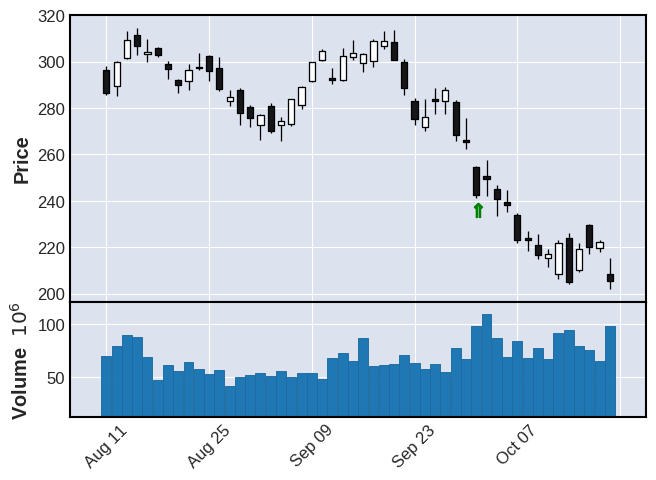

In [94]:
df = yf.Ticker('TSLA').history('50d', actions=False)

print(df.loc['2022-10-03 00:00:00-04:00'].name)
print(df.loc['2022-10-03 00:00:00-04:00'].name==pd.to_datetime('2022-10-03 00:00:00-04:00'))


print(np.where(df.loc['2022-10-03 00:00:00-04:00'].name=='2022-10-03 00:00:00-04:00', 1, np.nan))
buy = np.where(df.index=='2022-10-03 00:00:00-04:00', 1, np.nan) * 0.98 * df['Low']
apd = [mpf.make_addplot(buy, scatter=True, markersize=100, marker=r'$\Uparrow$', color='green')]
mpf.plot(df, type='candle', volume=True, addplot=apd)


In [3]:
#  create function to plot market and indexes
def plotPerformance(arg):
    df = arg
    df.info()
    
    #  plot #4
    plt.figure(figsize=(10,6))
    plt.plot(df[ticker])
    plt.title('SYMBOLS', fontsize = 14)
    plt.ylabel('percent change', fontsize = 14)
    plt.legend(df[ticker], loc="upper left", bbox_to_anchor=(1,1))
    plt.xticks(rotation = 90)
    plt.show()
print('function plotPerformance created')

function plotPerformance created


In [116]:
#tsla=yf.Ticker("ENPH").history('5y')
#mpf.plot(tsla['2021-01-01':'2022-09-10'])

#tsla.to_csv('tsla.csv')
# df=pd.read_csv('patterns.csv')
r = requests.get('https://194c-207-253-236-153.ngrok.io/search?mock=true&q=%5Bd%5DO.0+%2F+%5Bd%5DC.1+%3E+1.1%0D%0AAND+%5Bd%5DC.0+%3E+%5Bd%5DAVGC20.0+')
df = pd.DataFrame(r.json()['payload'])
df.info()
df['patternTime'] = pd.to_datetime(df['patternTime'])
df['patternTimeFrom'] = df['patternTime'] + pd.DateOffset(days=-60)
df['patternTimeTo'] = df['patternTime'] + pd.DateOffset(days=100)
print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   symbol       2 non-null      object
 1   patternTime  2 non-null      object
dtypes: object(2)
memory usage: 160.0+ bytes
  symbol patternTime patternTimeFrom patternTimeTo
0   TSLA  2022-07-12      2022-05-13    2022-10-20
1   ENPH  2022-08-31      2022-07-02    2022-12-09


https://194c-207-253-236-153.ngrok.io/chart/TSLA/d?from=2022-05-13&to=2022-10-20
<Response [200]>
                                 Open        High         Low       Close  \
Date                                                                        
2022-07-05 00:00:00-04:00  190.070007  193.639999  179.199997  192.589996   
2022-07-06 00:00:00-04:00  193.440002  199.410004  190.089996  194.929993   
2022-07-07 00:00:00-04:00  199.369995  212.889999  198.639999  206.839996   
2022-07-08 00:00:00-04:00  204.809998  219.089996  200.910004  216.449997   
2022-07-11 00:00:00-04:00  214.610001  214.869995  203.509995  206.059998   

                            Volume  
Date                                
2022-07-05 00:00:00-04:00  2619800  
2022-07-06 00:00:00-04:00  1642300  
2022-07-07 00:00:00-04:00  3826200  
2022-07-08 00:00:00-04:00  3578800  
2022-07-11 00:00:00-04:00  2479000  
              open    high     low   close    volume
tickTime                                          

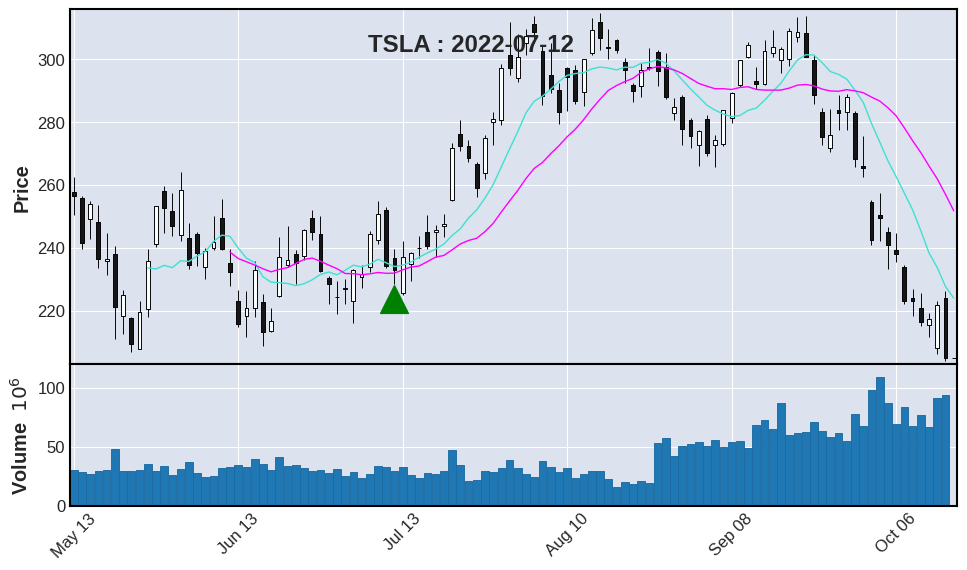

https://194c-207-253-236-153.ngrok.io/chart/ENPH/d?from=2022-07-02&to=2022-12-09
<Response [200]>
                                 Open        High         Low       Close  \
Date                                                                        
2022-07-05 00:00:00-04:00  190.070007  193.639999  179.199997  192.589996   
2022-07-06 00:00:00-04:00  193.440002  199.410004  190.089996  194.929993   
2022-07-07 00:00:00-04:00  199.369995  212.889999  198.639999  206.839996   
2022-07-08 00:00:00-04:00  204.809998  219.089996  200.910004  216.449997   
2022-07-11 00:00:00-04:00  214.610001  214.869995  203.509995  206.059998   

                            Volume  
Date                                
2022-07-05 00:00:00-04:00  2619800  
2022-07-06 00:00:00-04:00  1642300  
2022-07-07 00:00:00-04:00  3826200  
2022-07-08 00:00:00-04:00  3578800  
2022-07-11 00:00:00-04:00  2479000  
              open    high     low   close   volume
tickTime                                           

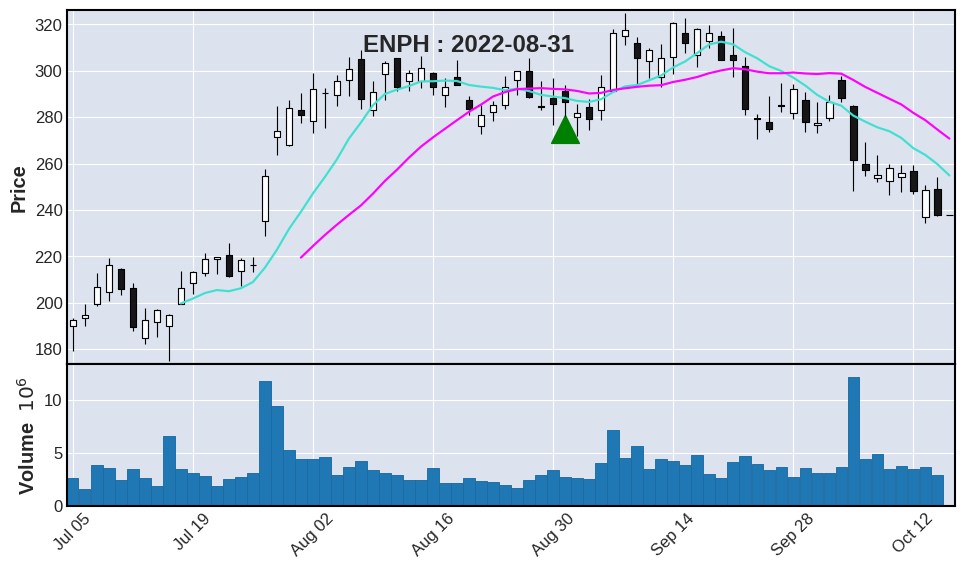

In [152]:
for index, row in df.iterrows():
    
    start=row['patternTimeFrom'].strftime('%Y-%m-%d')
    end=row['patternTimeTo'].strftime('%Y-%m-%d')

# urllib.parse.quote(query)
    url = 'https://194c-207-253-236-153.ngrok.io/chart/' + row['symbol'] + '/d?from=' + urllib.parse.quote(start) + '&to=' + urllib.parse.quote(end)
    print(url)
    chartResponse = requests.get(url)
    print(chartResponse)
    # chartDf = pd.json_normalize(json.loads(chartResponse.text))
    chartDf = pd.DataFrame(chartResponse.json()['payload'])
    chartDf.tickTime = pd.to_datetime(chartDf.tickTime)
    chartDf = chartDf.set_index('tickTime')
    chartDf.drop(['id', 'symbol','created'], axis=1, inplace=True)
    print(ticker.head())

    # ticker=yf.Ticker(row['symbol']).history('5y', start=start, end=end, actions=False)
    print(chartDf.head())

    # ticker.info

    entry = row['patternTime'].strftime('%Y-%m-%d')

    buy = np.where(chartDf.index==entry, 1, np.nan) * 0.98 * chartDf['low']
    apd = [mpf.make_addplot(buy, scatter=True,  type='scatter', markersize=400, marker='^', color='green')]

    print(chartDf[start:end])

    mpf.plot(chartDf[start:end], type='candle', 
         volume=True, mav=(10,20),title = row['symbol'] + ' : ' + row['patternTime'].strftime('%Y-%m-%d'),
        tight_layout=True, figratio=(16,9), addplot=apd)
    
    # plotPerformance(ticker)


              open    high     low   close    volume
tickTime                                            
2022-02-01  311.74  314.57  301.67  310.42  24379446
2022-02-02  309.39  310.50  296.47  301.89  22263685
2022-02-03  294.00  312.33  293.51  297.05  26285186
2022-02-04  299.07  312.17  293.72  307.77  24540691
2022-02-07  307.93  315.92  300.90  302.45  20081488
                                 Open        High         Low       Close  \
Date                                                                        
2022-05-13 00:00:00-04:00  257.826660  262.450012  250.523331  256.529999   
2022-05-16 00:00:00-04:00  255.720001  256.586670  239.696671  241.456665   
2022-05-17 00:00:00-04:00  249.119995  254.826660  242.949997  253.869995   
2022-05-18 00:00:00-04:00  248.173340  253.500000  233.603333  236.603333   
2022-05-19 00:00:00-04:00  235.666672  244.666672  231.369995  236.473328   

                             Volume  
Date                                 
2022-05-13 00

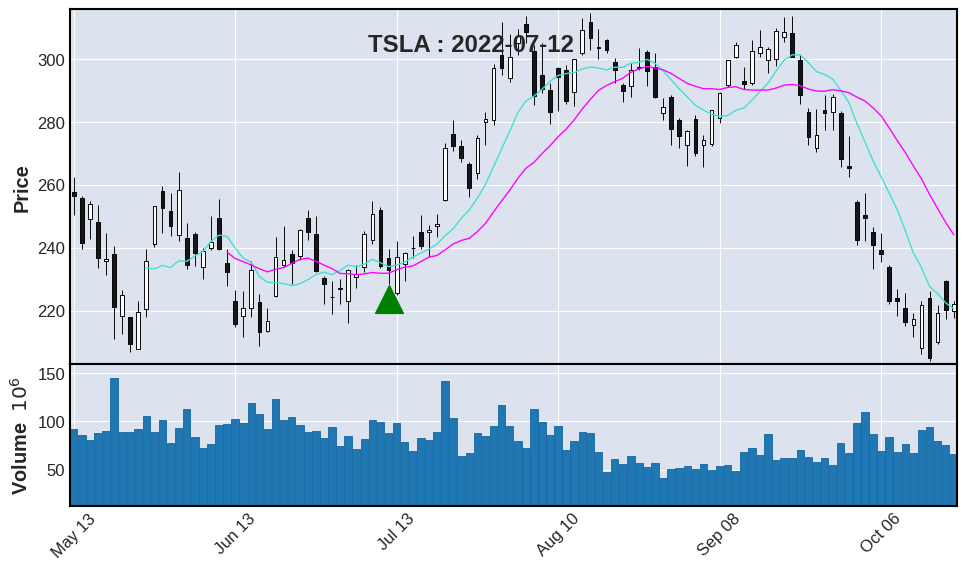

              open    high     low   close    volume
tickTime                                            
2022-02-01  311.74  314.57  301.67  310.42  24379446
2022-02-02  309.39  310.50  296.47  301.89  22263685
2022-02-03  294.00  312.33  293.51  297.05  26285186
2022-02-04  299.07  312.17  293.72  307.77  24540691
2022-02-07  307.93  315.92  300.90  302.45  20081488
                                 Open        High         Low       Close  \
Date                                                                        
2022-07-05 00:00:00-04:00  190.070007  193.639999  179.199997  192.589996   
2022-07-06 00:00:00-04:00  193.440002  199.410004  190.089996  194.929993   
2022-07-07 00:00:00-04:00  199.369995  212.889999  198.639999  206.839996   
2022-07-08 00:00:00-04:00  204.809998  219.089996  200.910004  216.449997   
2022-07-11 00:00:00-04:00  214.610001  214.869995  203.509995  206.059998   

                            Volume  
Date                                
2022-07-05 00:0

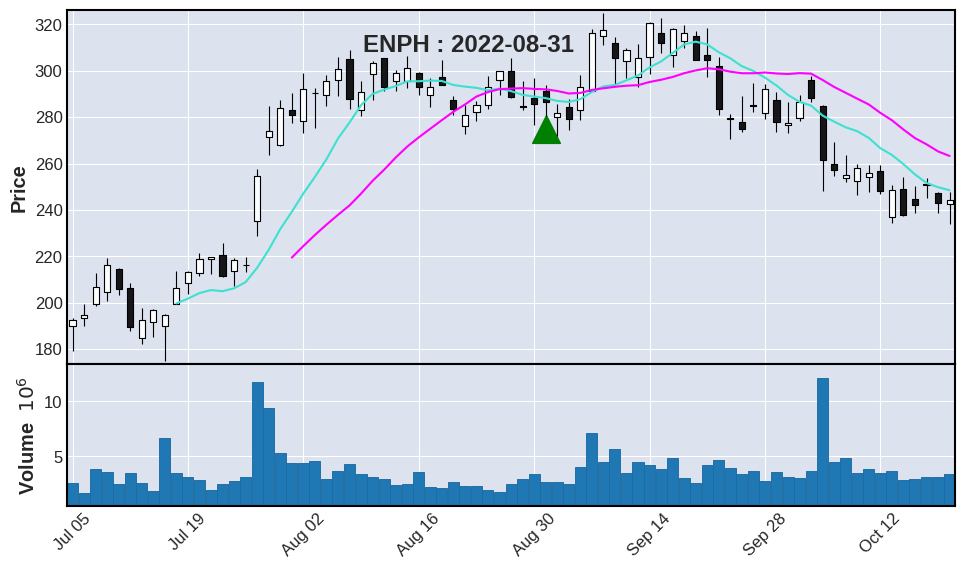

In [140]:
for index, row in df.iterrows():
    
    start=row['patternTimeFrom'].strftime('%Y-%m-%d')
    end=row['patternTimeTo'].strftime('%Y-%m-%d')

# urllib.parse.quote(query)

    chartResponse = requests.get('https://194c-207-253-236-153.ngrok.io/chart/TSLA/d?from=2022-02-01T00%3A00%3A00&to=2022-05-30T00%3A00%3A00')
    chartDf = pd.DataFrame(chartResponse.json()['payload'])
    chartDf.tickTime = pd.to_datetime(chartDf.tickTime)
    chartDf = chartDf.set_index('tickTime')
    chartDf.drop(['id', 'symbol','created'], axis=1, inplace=True)
    print(chartDf.head())

    ticker=yf.Ticker(row['symbol']).history('5y', start=start, end=end, actions=False)
    print(ticker.head())

    # ticker.info

    entry = row['patternTime'].strftime('%Y-%m-%d %H:%M:%S-04:00')

    buy = np.where(ticker.index==entry, 1, np.nan) * 0.98 * ticker['Low']
    apd = [mpf.make_addplot(buy, scatter=True,  type='scatter', markersize=400, marker='^', color='green')]

    mpf.plot(ticker[start:end], type='candle', 
         volume=True, mav=(10,20),title = row['symbol'] + ' : ' + row['patternTime'].strftime('%Y-%m-%d'),
        tight_layout=True, figratio=(16,9), addplot=apd)
    
    # plotPerformance(ticker)
